# **DL_MultiTaskLearning_DonationMaximization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

### Data Preparation

In [ ]:
df = pd.read_csv('G:\我的雲端硬碟\GitHub_Desktop\DL_MultiTaskLearning_DonationMaximization_\Data\Donar_Data.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 99728 non-null   object 
 4   STATE                99728 non-null   object 
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  object 
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            70297 non-null   object 
 10  GRAD_DEGREE          54423 non-null   object 
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          54393 non-null   object 
 13  GENDER               118854 non-null  object 
 14  MARRIED_TO_ALUM      118854 non-null  object 
 15  ROTC             

In [11]:
df.describe(include = 'all')

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
count,118854,118854.000000,118854.000000,99728,99728,99728,12957,118854,118854.000000,70297,54423,54422.00000,54393,118854,118854,118854.000000,118854.000000
unique,118854,NaN,NaN,4515,60,87028,20,2,NaN,10,38,NaN,9,2,2,NaN,NaN
top,003o000000pO6zhAAC,NaN,NaN,San Francisco,CA,94118,L,Undergraduate,NaN,College of Arts and Sci (Arts),MA,NaN,School of Education,F,N,NaN,NaN
freq,1,NaN,NaN,13763,77935,38,693,64431,NaN,24244,17376,NaN,16030,67199,115013,NaN,NaN
mean,NaN,0.485714,214.147586,NaN,NaN,NaN,NaN,NaN,1996.331609,NaN,NaN,1999.43736,NaN,NaN,NaN,0.051248,0.089345
std,NaN,1.497361,3033.199077,NaN,NaN,NaN,NaN,NaN,16.569137,NaN,NaN,14.38638,NaN,NaN,NaN,0.220504,0.285242
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1855.000000,NaN,NaN,1915.00000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,1988.00000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,2001.00000,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,2012.00000,NaN,NaN,NaN,0.000000,0.000000


In [12]:
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,Gainesville,FL,32605-6400,NaN,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,003o000000pOSIxAAO,1,100.0,Pasadena,CA,91105-1515,NaN,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,003o000000pNvhHAAS,4,1700.0,San Rafael,CA,94901-2478,NaN,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,003o000000q0hl1AAA,0,0.0,San Antonio,TX,78232-4154,T,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,003o000000pOZe9AAG,5,500.0,Westborough,MA,1581,NaN,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [13]:
df.dtypes

ACCOUNT_ID              object
NUMBER_OF_DONATIONS      int64
VALUE_OF_DONATIONS     float64
CITY                    object
STATE                   object
ZIP                     object
MI                      object
ALUMNI_TYPE             object
UG_CLASS_YEAR            int64
UG_SCHOOL               object
GRAD_DEGREE             object
GRAD_CLASS_YEAR        float64
GRAD_SCHOOL             object
GENDER                  object
MARRIED_TO_ALUM         object
ROTC                     int64
JC                       int64
dtype: object

In [14]:
df.isnull().sum()

ACCOUNT_ID                  0
NUMBER_OF_DONATIONS         0
VALUE_OF_DONATIONS          0
CITY                    19126
STATE                   19126
ZIP                     19126
MI                     105897
ALUMNI_TYPE                 0
UG_CLASS_YEAR               0
UG_SCHOOL               48557
GRAD_DEGREE             64431
GRAD_CLASS_YEAR         64432
GRAD_SCHOOL             64461
GENDER                      0
MARRIED_TO_ALUM             0
ROTC                        0
JC                          0
dtype: int64

#### Drop insignificant columns

In [15]:
df = df.drop(['MI'], axis = 1)

#### Unique values in each categorical column

In [41]:
categorical_col = ['ZIP', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR', 'GENDER', 'MARRIED_TO_ALUM', 'ROTC', 'JC']
for c in categorical_col:
  print(df[c].unique())

['32605-6400' '91105-1515' '94901-2478' ... '94108-3820' '96067-1194'
 '95003-3172']
['Graduate' 'Undergraduate']
['UG_SCHOOL_Unknown' 'School of Nursing'
 'Business and Professional Studies' 'Arts and Sciences'
 'School of Education' 'School of Law' 'Continuing Education'
 'Not Categorized']
['MS' 'JD' 'NA' 'MA' 'MBA' 'MPA' 'MHR' 'EDD' 'MAT' 'MSE' 'MRA' 'MSP' 'MHL'
 'MSN' 'MPT' 'MNA' 'MMD' 'MAS' 'MAW' 'MFA' 'PSD' 'LLM' 'CRD' 'DNP' 'MGEM'
 'MGEN' 'MPH' 'MOPA' 'PSYD' 'PSM' 'MLSL' 'MIG' 'HON' 'MSA' 'NDG' 'MNB'
 'MCA' 'MSB' 'MPM']
['1960s' 'NA' '1920s' '1970s' '1950s' '1980s' '1990s' '1940s' '2000s'
 '1930s' '2010s' '2020s' '1910s']
['Arts and Sciences' 'Law' 'GRAD_SCHOOL_Unknown' 'Education' 'Nursing'
 'Business and Professional Studies']
['1960s' '1950s' '1920s' '1970s' '1940s' '1930s' '1990s' '1980s' '2000s'
 '2010s' '2020s' '1910s' '1900s' '1850s']
[1 0]
[0 1]
[0 1]
[0 1]


#### 'ZIP'

In [22]:
df['ZIP_V2'] = df['ZIP'].str.replace('-', '').str[3:]

In [26]:
df['ZIP_V2'] = df['ZIP_V2'].apply(lambda x: '000000' if len(str(x)) < 6 else x)

In [27]:
df['ZIP_V2'] = df['ZIP_V2'].fillna(value = '000000')

#### 'GRAD_SCHOOL'

In [31]:
GRAD_SCHOOL_mapping_dict = {
    'College of Arts and Sci (Sci)': 'Arts and Sciences',
    'College of Arts and Sci (Arts)': 'Arts and Sciences',
    'Col of Arts/Sci and Sch Mgt': 'Arts and Sciences',
    'School of Law': 'Law',
    'School of Education': 'Education',
    'School of Nursing': 'Nursing',
    'School of Business': 'Business and Professional Studies',
    'Sch of Bus and Prof Studies': 'Business and Professional Studies',
    'College of Prof. Studies': 'Business and Professional Studies',
    np.nan: 'GRAD_SCHOOL_Unknown'
}

df['GRAD_SCHOOL'] = df['GRAD_SCHOOL'].replace(GRAD_SCHOOL_mapping_dict)


#### 'UG_SCHOOL'

In [32]:
UG_SCHOOL_mapping_dict = {
    'School of Nursing': 'School of Nursing',
    'School of Business': 'Business and Professional Studies',
    'Sch of Bus and Prof Studies': 'Business and Professional Studies',
    'College of Arts and Sci (Arts)': 'Arts and Sciences',
    'College of Arts and Sci (Sci)': 'Arts and Sciences',
    'School of Education': 'School of Education',
    'College of Prof. Studies': 'Business and Professional Studies',
    'School of Law': 'School of Law',
    'Continuing Education': 'Continuing Education',
    'Not used in standing': 'Not Categorized',
    np.nan: 'UG_SCHOOL_Unknown'
  }

df['UG_SCHOOL'] = df['UG_SCHOOL'].replace(UG_SCHOOL_mapping_dict)


#### 'GENDER', 'MARRIED_TO_ALUM'

In [33]:
GENDER_mapping_dict = {
    'M': 1,
    'F': 0,
    np.nan: 'GENDER_Unknown'
  }

MARRIED_TO_ALUM_mapping_dict = {
    'N': 0,
    'Y': 1,
    np.nan: 'MARRIED_TO_ALUM_Unknown'
  }

df['GENDER'] = df['GENDER'].replace(GENDER_mapping_dict)
df['MARRIED_TO_ALUM'] = df['MARRIED_TO_ALUM'].replace(MARRIED_TO_ALUM_mapping_dict)

#### 'GRAD_CLASS_YEAR', 'UG_CLASS_YEAR'

In [34]:
def year_mapping(year):
    if np.isnan(year):
        return 'NA'
    else:
        return str(int(year//10 * 10)) + 's'

df['UG_CLASS_YEAR'] = df['UG_CLASS_YEAR'].apply(year_mapping)
df['GRAD_CLASS_YEAR'] = df['GRAD_CLASS_YEAR'].apply(year_mapping)

#### 'GRAD_DEGREE'

In [35]:
df['GRAD_DEGREE'] = df['GRAD_DEGREE'].fillna(value = 'NA')

#### 'DONATED'

In [36]:
df['Donated'] = df['NUMBER_OF_DONATIONS'].apply(lambda x: 1 if x > 0 else 0)

#### 'AVERAGE_DONATIONS'

In [38]:
df['AVERAGE_DONATIONS'] = df['VALUE_OF_DONATIONS'] / df['NUMBER_OF_DONATIONS']


#### Unique Values

In [42]:
categorical_col = ['STATE', 'CITY', 'ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR', 'GENDER', 'MARRIED_TO_ALUM', 'ROTC', 'JC']
for c in categorical_col:
  print(df[c].unique())

['FL' 'CA' 'TX' 'MA' nan 'TN' 'WA' 'UT' 'NY' 'MN' 'ID' 'VA' 'NC' 'WI' 'CO'
 'LA' 'OR' 'NV' 'NM' 'KY' 'IL' 'HI' 'MO' 'NE' 'AR' 'GA' 'AZ' 'IA' 'RI'
 'ME' 'AK' 'DC' 'AL' 'MD' 'MT' 'CT' 'MI' 'WY' 'OK' 'NH' 'NJ' 'PA' 'VT'
 'DE' 'OH' 'SC' 'WV' 'IN' 'MS' 'SD' 'KS' 'GU' 'AP' 'ND' 'MP' 'VI' 'AE'
 'PR' 'AS' 'FM' 'AA']
['Gainesville' 'Pasadena' 'San Rafael' ... 'Cambria Heights' 'Wilson'
 'Lake View Ter']
['056400' '051515' '012478' ... '156110' '083820' '671194']
['Graduate' 'Undergraduate']
['UG_SCHOOL_Unknown' 'School of Nursing'
 'Business and Professional Studies' 'Arts and Sciences'
 'School of Education' 'School of Law' 'Continuing Education'
 'Not Categorized']
['MS' 'JD' 'NA' 'MA' 'MBA' 'MPA' 'MHR' 'EDD' 'MAT' 'MSE' 'MRA' 'MSP' 'MHL'
 'MSN' 'MPT' 'MNA' 'MMD' 'MAS' 'MAW' 'MFA' 'PSD' 'LLM' 'CRD' 'DNP' 'MGEM'
 'MGEN' 'MPH' 'MOPA' 'PSYD' 'PSM' 'MLSL' 'MIG' 'HON' 'MSA' 'NDG' 'MNB'
 'MCA' 'MSB' 'MPM']
['1960s' 'NA' '1920s' '1970s' '1950s' '1980s' '1990s' '1940s' '2000s'
 '1930s' '2010s' '2020s

#### Missing Value

In [49]:
df.isnull().sum()

ACCOUNT_ID                 0
NUMBER_OF_DONATIONS        0
VALUE_OF_DONATIONS         0
CITY                       0
STATE                      0
ZIP                    19126
ALUMNI_TYPE                0
UG_CLASS_YEAR              0
UG_SCHOOL                  0
GRAD_DEGREE                0
GRAD_CLASS_YEAR            0
GRAD_SCHOOL                0
GENDER                     0
MARRIED_TO_ALUM            0
ROTC                       0
JC                         0
ZIP_V2                     0
DONATED                    0
AVERAGE_DONATIONS          0
dtype: int64

In [48]:
df['STATE'].fillna(0, inplace=True)
df['CITY'].fillna(0, inplace=True)
df['AVERAGE_DONATIONS'].fillna(0, inplace=True)

#### Categorical Variable

In [50]:
from category_encoders import CountEncoder, TargetEncoder

In [115]:
target_encoder = TargetEncoder()

encoded_columns = target_encoder.fit_transform(df[['ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR','STATE','CITY']], df['DONATED'])
encoded_columns = encoded_columns.rename(columns = {'ZIP_V2': 'ZIP_ENCODED', 'ALUMNI_TYPE': 'ALUMNI_TYPE_ENCODED', 'UG_SCHOOL': 'UG_SCHOOL_ENCODED', 'GRAD_DEGREE': 'GRAD_DEGREE_ENCODED', 'GRAD_CLASS_YEAR': 'GRAD_CLASS_YEAR_ENCODED', 'GRAD_SCHOOL': 'GRAD_SCHOOL_ENCODED', 'UG_CLASS_YEAR': 'UG_CLASS_YEAR_ENCODED','STATE': 'STATE_ENCODED', 'CITY': 'CITY_ENCODED'})

In [116]:
df_encoded = pd.concat([df, pd.DataFrame(encoded_columns)], axis = 1)
df_encoded = df_encoded.drop(['ZIP', 'ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR','STATE','CITY'], axis = 1)

#### Split the Data

In [117]:
X = df_encoded.drop(['DONATED', 'NUMBER_OF_DONATIONS', 'VALUE_OF_DONATIONS', 'ACCOUNT_ID'], axis = 1)
Y_regression = df_encoded['VALUE_OF_DONATIONS']
Y_classification= df_encoded['DONATED']

In [120]:
X_train, X_test, Y_regression_train, Y_regression_test, Y_classification_train, Y_classification_test = train_test_split(X, Y_regression, Y_classification, test_size=0.2, random_state=42)

### Data Exploration

### Data Modeling

In [159]:
import os
from datetime import datetime

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras

import mlflow
import optuna

In [160]:
MLFLOW_TRACKING_URI = mlflow.get_tracking_uri()
EXPERIMENT_NAME = "DonationMaximization"

In [161]:
MLFLOW_TRACKING_URI

'http://localhost:5000'

In [162]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if experiment is None:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME) 
else:
    experiment_id = experiment.experiment_id

In [ ]:
def objective(trial):

    with mlflow.start_run(nested=True) as run:

        trial_num = trial.number
        mlflow.set_tag("trial_num", trial_num)
        
        # Set up Options for Hyperparameters Tuning
        units = trial.suggest_categorical("units", [16, 32, 64, 128])
        dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
        activation = trial.suggest_categorical("activation", ["relu", "elu", "tanh"])
        
        # Log Hyperparameters to MLflow
        params = {
            "units": units,
            "dropout_rate": dropout_rate,
            "learning_rate": learning_rate,
            "activation": activation,
            "batch_size": 32,
            "epochs": 50,
            "early_stopping_patience": 5
        }
        mlflow.log_params(params)
    
        # Set User Attributes for Trial
        trial.set_user_attr("run_id", run.info.run_id)
        trial.set_user_attr("model_path", f"model_trial_{trial.number}")
        
        # Model Building
        inputs = tf.keras.Input(shape=X_train.shape[1:])
        x = inputs
        x = tf.keras.layers.Dense(units, activation=activation)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        
        reg_output = tf.keras.layers.Dense(1, name='regression_output')(x)
        class_output = tf.keras.layers.Dense(1, activation='sigmoid', name='classification_output')(x)
        
        model = tf.keras.Model(inputs=inputs, outputs=[reg_output, class_output])
        
        # Model Compilation
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss={
                'regression_output': 'mse',
                'classification_output': 'binary_crossentropy'
            },
            metrics={
                'regression_output': 'mae',
                'classification_output': 'accuracy'
            }
        )
        
        # Model Training
        history = model.fit(
            x=X_train,
            y={'regression_output': Y_regression_train, 'classification_output': Y_classification_train},
            validation_data=(X_test, {'regression_output': Y_regression_test, 'classification_output': Y_classification_test}),
            epochs=50,
            batch_size=32,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            ],
            verbose=0 
        )
    
        # Log Metrics to MLflow
        for epoch in range(len(history.history['loss'])):
            metrics_dict = {}
            for metric_name, values in history.history.items():
                if epoch < len(values):
                    metrics_dict[metric_name] = values[epoch]
            mlflow.log_metrics(metrics_dict, step=epoch)
        
        # Generate Best Validation Metrics
        val_loss_history = history.history['val_loss']
        best_epoch_idx = np.argmin(val_loss_history)
        best_val_loss = val_loss_history[best_epoch_idx]
        best_val_reg_mae = history.history['val_regression_output_mae'][best_epoch_idx]
        best_val_class_acc = history.history['val_classification_output_accuracy'][best_epoch_idx]
        
        # Log Best Validation Metrics to MLflow
        mlflow.log_metrics({
            "best_val_loss": best_val_loss,
            "best_val_reg_mae": best_val_reg_mae,
            "best_val_class_acc": best_val_class_acc,
            "best_epoch": best_epoch_idx + 1,
            "epochs_trained": len(history.history['loss'])
        })
        
        # Log Model to MLflow
        model_name = f"model_trial_{trial_num}"
        mlflow.keras.log_model(keras_model=model, artifact_path=model_name)
        
        # Log Run ID to MLflow
        mlflow.log_param("run_id", run.info.run_id)
        
        return best_val_loss

# Optimize Hyperparameters conducting Optuna
now = datetime.now().strftime("%Y%m%d_%H%M")
with mlflow.start_run(run_name=f"Optuna_Optimization_{now}") as main_run:
    study = optuna.create_study(direction="minimize", study_name="Optuna_Optimization")
    study.optimize(objective, n_trials=5) 
    
    # Generate Best Trial Information
    best_trial_num = study.best_trial.number
    best_val_loss = study.best_value
    
    mlflow.log_params({
        "best_trial": best_trial_num,
        "best_val_loss": best_val_loss,
        "total_trials": len(study.trials)
    })
    
    # Log Best Parameters
    mlflow.log_params({f"best_{k}": v for k, v in study.best_params.items()})

    
    # Generate Best Trial Information for Loading Best Model
    best_trial = study.best_trial
    best_run_id = best_trial.user_attrs["run_id"]
    best_model_path = best_trial.user_attrs["model_path"]
    
    # Load Best Model
    best_model_uri = f"runs:/{best_run_id}/{best_model_path}"
    best_model = mlflow.keras.load_model(best_model_uri)
    mlflow.keras.log_model(
        keras_model=best_model, 
        artifact_path="best_model",
        registered_model_name="DonationMaximization_MTL_Model"
    )

[I 2025-06-29 22:40:27,229] A new study created in memory with name: Optuna_Optimization


INFO:tensorflow:Assets written to: C:\Users\Reazeng\AppData\Local\Temp\tmp7t4zmr2p\model\data\model\assets


[I 2025-06-29 22:42:38,715] Trial 0 finished with value: 4076103.25 and parameters: {'units': 16, 'dropout_rate': 0.1, 'learning_rate': 0.0027271187876076373, 'activation': 'relu'}. Best is trial 0 with value: 4076103.25.


INFO:tensorflow:Assets written to: C:\Users\Reazeng\AppData\Local\Temp\tmpfv7dqnpp\model\data\model\assets


[I 2025-06-29 22:49:18,088] Trial 1 finished with value: 5901341.0 and parameters: {'units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.0003039537374235948, 'activation': 'tanh'}. Best is trial 0 with value: 4076103.25.


INFO:tensorflow:Assets written to: C:\Users\Reazeng\AppData\Local\Temp\tmpl9l3twby\model\data\model\assets


[I 2025-06-29 22:53:18,032] Trial 2 finished with value: 3170297.0 and parameters: {'units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.004493396937020764, 'activation': 'elu'}. Best is trial 2 with value: 3170297.0.


INFO:tensorflow:Assets written to: C:\Users\Reazeng\AppData\Local\Temp\tmpry7pmwuf\model\data\model\assets


[I 2025-06-29 22:55:01,269] Trial 3 finished with value: 6146283.0 and parameters: {'units': 64, 'dropout_rate': 0.1, 'learning_rate': 0.0008373152184518921, 'activation': 'tanh'}. Best is trial 2 with value: 3170297.0.


INFO:tensorflow:Assets written to: C:\Users\Reazeng\AppData\Local\Temp\tmph6u80zz1\model\data\model\assets


[I 2025-06-29 22:56:20,962] Trial 4 finished with value: 4567158.5 and parameters: {'units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.021310968075939546, 'activation': 'elu'}. Best is trial 2 with value: 3170297.0.


INFO:tensorflow:Assets written to: C:\Users\Reazeng\AppData\Local\Temp\tmp70bph6ey\model\data\model\assets


Registered model 'DonationMaximization_MTL_Model_20250629' already exists. Creating a new version of this model...
2025/06/29 22:56:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: DonationMaximization_MTL_Model_20250629, version 2
Created version '2' of model 'DonationMaximization_MTL_Model_20250629'.


---

### Establish classification models for predicting probability

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Split the data into training set and testing set

In [18]:
X = df_train.drop(['ACCOUNT_ID', 'Target', 'VALUE_OF_DONATIONS', 'NUMBER_OF_DONATIONS'], axis = 1)
y = df_train['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 15)

X_0 = df_train[df_train['Target'] == 0].drop(['ACCOUNT_ID', 'Target', 'VALUE_OF_DONATIONS', 'NUMBER_OF_DONATIONS'], axis = 1)
y_0 = df_train[df_train['Target'] == 0]['Target']

#### Random forest

In [21]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 15, class_weight = {0: 0.17, 1: 0.83})

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

acc_rfc = accuracy_score(y_pred_rfc, y_test)

In [ ]:
acc_rfc

In [53]:
y_0_pred_rfc = rfc.predict_proba(X_0)

In [54]:
account_id_0 = df_train[df_train['Target'] == 0]['ACCOUNT_ID']
df_proba_rfc = pd.DataFrame({'ACCOUNT_ID': account_id_0.values, '0': y_0_pred_rfc[:, 0], '1': y_0_pred_rfc[:, 1]})

In [ ]:
# 設定早停回調proba_rfc['1'] > 0])    tf.convert_to_tensor(X_train, dtype=tf.float32),    {'regression_output': Y_regression_train, 'classification_output': Y_classification_train},    validation_data=(X_test, {'regression_output': Y_regression_test, 'classification_output': Y_classification_test}),    epochs=50,    batch_size=32,    callbacks=[        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)    ])    tf.convert_to_tensor(X_train, dtype=tf.float32),early_stopping = tf.keras.callbacks.EarlyStopping(    monitor='val_loss',     patience=5,     restore_best_weights=True)# 準備訓練資料X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)

y_train = {
    'regression_output': Y_regression_train, 
    'classification_output': Y_classification_train
}

y_test = {
    'regression_output': Y_regression_test, 
    'classification_output': Y_classification_test
}

# 訓練模型
history = model.fit(
    X_train_tensor,
    y_train,
    validation_data=(X_test_tensor, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

#### LightGBM

In [19]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(class_weight = {0: 0.17, 1: 0.83})
lgbmc.fit(X_train, y_train)

y_pred_lgbmc = lgbmc.predict(X_test)
acc_lgbmc = accuracy_score(y_pred_lgbmc, y_test)

[LightGBM] [Info] Number of positive: 10125, number of negative: 49302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 59427, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500668 -> initscore=0.002670
[LightGBM] [Info] Start training from score 0.002670


In [20]:
acc_lgbmc

0.6835949989062211

In [21]:
y_0_pred_lgbmc = lgbmc.predict_proba(X_0)

In [22]:
account_id_0 = df_train[df_train['Target'] == 0]['ACCOUNT_ID']
df_proba_lgbmc = pd.DataFrame({'ACCOUNT_ID': account_id_0.values, '0': y_0_pred_lgbmc[:, 0], '1': y_0_pred_lgbmc[:, 1]})

In [27]:
len(df_proba_lgbmc[df_proba_lgbmc['1'] > 0])

98620

#### XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(class_weight = {0: 0.17, 1: 0.83})
xgbc.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_test)
acc_xgbc = accuracy_score(y_pred_xgbc, y_test)

In [62]:
y_0_pred_xgbc = xgbc.predict_proba(X_0)

In [63]:
account_id_0 = df_train[df_train['Target'] == 0]['ACCOUNT_ID']
df_proba_xgbc = pd.DataFrame({'ACCOUNT_ID': account_id_0.values, '0': y_0_pred_xgbc[:, 0], '1': y_0_pred_xgbc[:, 1]})

In [ ]:
len(df_proba_xgbc[df_proba_xgbc['1'] > 0])

### Feature importance

In [65]:
from sklearn.inspection import permutation_importance

In [66]:
def pi_boxplot(model):

  result_pi = permutation_importance(model, X_test, y_test, n_repeats = 3, random_state = 15)

  sorted_idx = result_pi.importances_mean.argsort()

  importances_df = pd.DataFrame(result_pi.importances[sorted_idx].T, columns = X_test.columns[sorted_idx])

  plt.figure(figsize=(10, 6))
  sns.boxplot(data = importances_df, orient = 'h', palette = 'Blues')
  plt.title('Permutation Importances (Test Set)')
  plt.show()

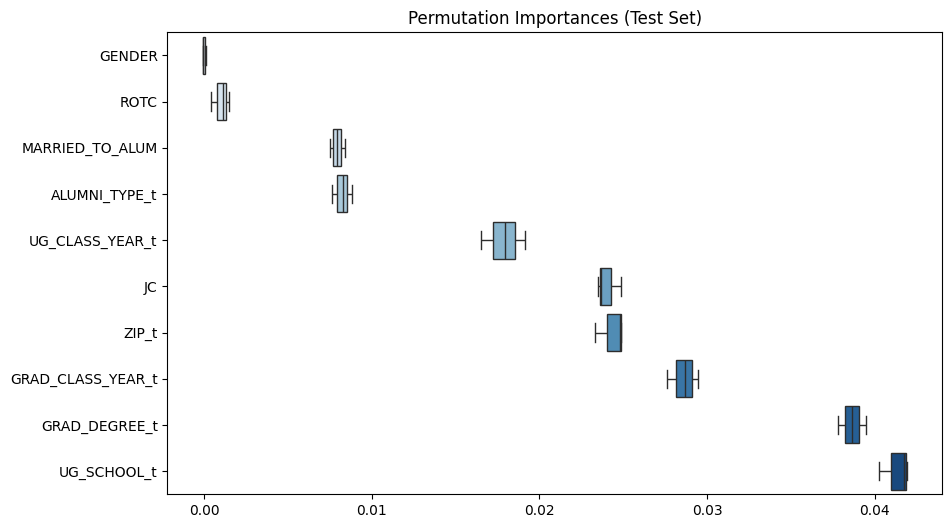

In [83]:
pi_boxplot(lgbmc)

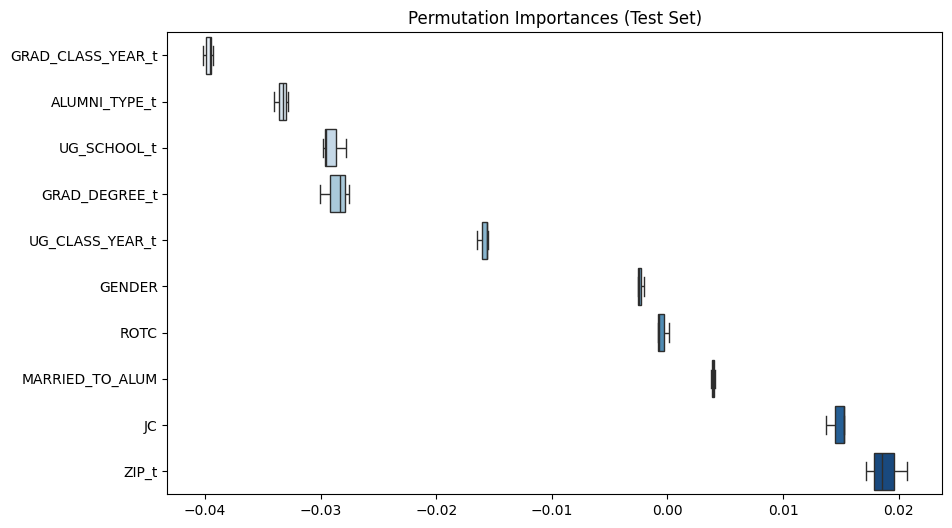

In [84]:
pi_boxplot(rfc)

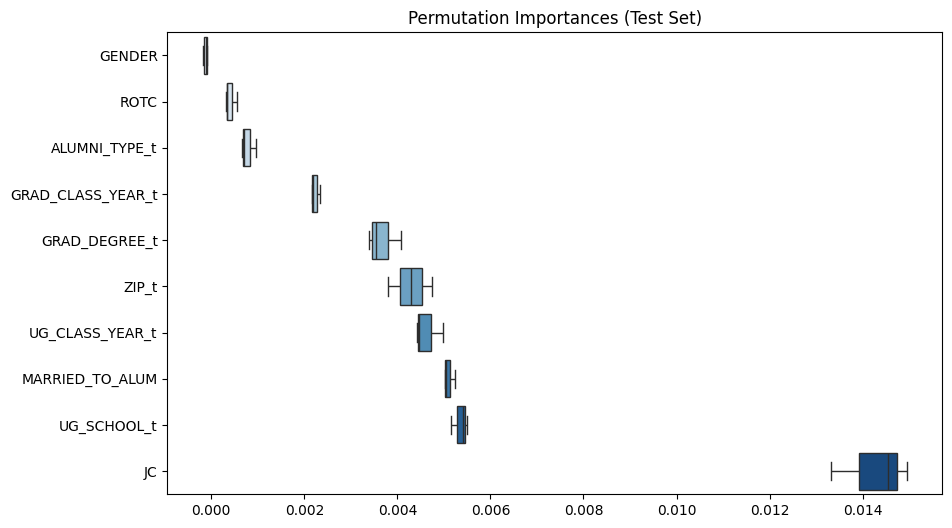

In [177]:
pi_boxplot(xgbc)

### Model performance comparison

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#### Accuracy, Fl, Precision, Recall

In [68]:
model_score = {}
y_pred_list = [y_pred_rfc, y_pred_lgbmc, y_pred_xgbc]

scores = [acc_rfc] + [acc_lgbmc] + [acc_xgbc]+ [f1_score(y_pred_list[i], y_test) for i in range(3)] + [precision_score(y_pred_list[i], y_test) for i in range(3)] + [recall_score(y_pred_list[i], y_test) for i in range(3)]
model_name = ['Random Forest', 'LightGBM', 'XGBoost'] * 4
score_type = ['Accuracy'] * 3 + ['F1'] * 3 + ['Precision'] * 3 + ['Recall'] * 3

result = {'Model': model_name, 'Score': scores, 'Score Type': score_type}
result = pd.DataFrame(result)

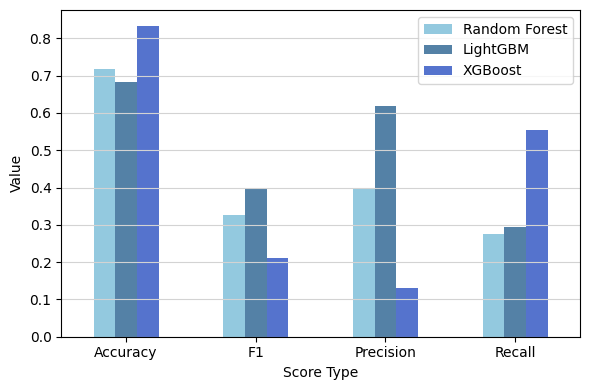

In [70]:
plt.figure(figsize = (6, 4))
plt.grid(color = 'lightgray', axis = 'y')
sns.barplot(x = 'Score Type', y = 'Score', data = result, hue = 'Model', palette = ['skyblue', 'steelblue', 'royalblue'], width = 0.5)
plt.xlabel('Score Type')
plt.ylabel('Value')
plt.legend(fontsize = 10)
plt.tight_layout()
plt.show()

#### Confusion Matrix

In [200]:
def create_confusion_matrix(label_true, label_pred):
    mat = confusion_matrix(label_true, label_pred)
    plt.figure(figsize = (6, 6))
    sns.heatmap(mat, cmap = 'Blues', alpha = 0.8, annot = True, fmt = 'd')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

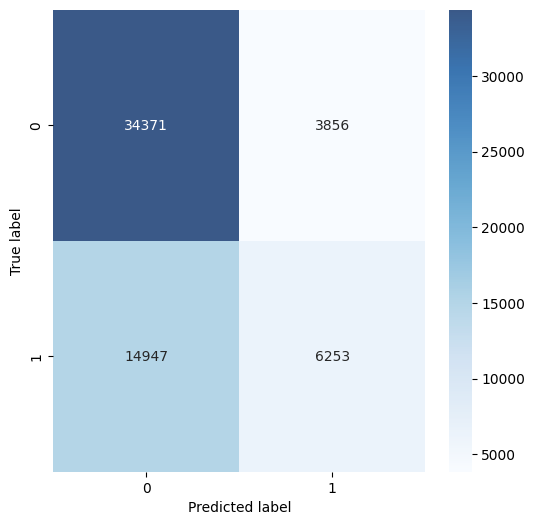

In [214]:
create_confusion_matrix(y_pred_lgbmc, y_test)

### LightGBM is selected to choose target alumni according to the above figure

#### Probablity distribution of 10,000 selected alumni

In [23]:
sorted_df_proba_lgbmc = df_proba_lgbmc.sort_values(by = '1', ascending = False).iloc[0: 10000]

In [ ]:
plt.figure(figsize = (8, 6))
plt.grid(color = 'lightgray', axis = 'y')
sns.distplot(sorted_df_proba_lgbmc.iloc[0: 10000]['1'])
plt.xlabel('Probability')
plt.ylabel('Value')
plt.legend(fontsize = 10)
plt.tight_layout()
plt.show()

#### Export excel file including 10000 selected alumni data according to probability

In [24]:
df_2 = pd.merge(df, sorted_df_proba_lgbmc, on = 'ACCOUNT_ID', how = 'inner')

In [ ]:
df_2.to_excel('Selected 10000 Alumni Attributes.xlsx', index = False)
files.download('Selected 10000 Alumni Attributes.xlsx')

#### Feature trends of 10,000 selected alumni

In [75]:
def pie_plot(c):
  plt.figure(figsize = (6, 6))
  plt.grid(color = 'lightgray', axis = 'y')
  plt.pie(c.value_counts(), labels = c.value_counts().index, colors = ['skyblue', 'steelblue'])
  plt.legend(fontsize = 10)
  plt.tight_layout()
  plt.show()

In [ ]:
for c in ['GENDER', 'MARRIED_TO_ALUM', 'JC', 'ROTC', 'ALUMNI_TYPE']:
  print(c)
  pie_plot(sorted_df_3[c])

In [116]:
def count_plot(c):
  order = sorted_df_3[c].value_counts().sort_values(ascending = False).nlargest(10).index
  plt.figure(figsize = (8, 6))
  plt.grid(color = 'lightgray', axis = 'y')
  sns.countplot(data = sorted_df_3, x = c, palette = list(reversed(sns.color_palette('Blues'))), alpha = 0.8, order = order)
  plt.legend(fontsize = 10)
  plt.xticks(rotation = 'vertical')
  plt.tight_layout()
  plt.show()

In [ ]:
for c in ['ZIP','UG_CLASS_YEAR','UG_SCHOOL','GRAD_DEGREE','GRAD_CLASS_YEAR','GRAD_SCHOOL']:
  count_plot(c)

### Establish regression models for predicting amount of donations

#### Data preparation

In [25]:
df_train_2 = df_train.copy()
df_train_2['AVERAGE_DONATIONS'] = df_train_2['VALUE_OF_DONATIONS'] / df_train_2['NUMBER_OF_DONATIONS']
X_2 = df_train_2.drop(['NUMBER_OF_DONATIONS', 'Target', 'ACCOUNT_ID', 'VALUE_OF_DONATIONS', 'AVERAGE_DONATIONS'], axis = 1)
y_2 = df_train_2['AVERAGE_DONATIONS']

y_2 = y_2.fillna(value = 0)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.5, random_state = 15)

X_0_2 = df_train_2[df_train_2['Target'] == 0].drop(['NUMBER_OF_DONATIONS', 'Target', 'ACCOUNT_ID', 'VALUE_OF_DONATIONS', 'AVERAGE_DONATIONS'], axis = 1)
y_0_2 = df_train_2[df_train_2['Target'] == 0]['AVERAGE_DONATIONS']

y_0_2 = y_0_2.fillna(value = 0)

#### Model building and predicting

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.01, max_depth = 3, random_state = 15)
gbr.fit(X_train_2, y_train_2)

y_pred_gbr = gbr.predict(X_test_2)
mse_gbr = mean_squared_error(y_pred_gbr, y_test_2)

In [27]:
y_0_pred_gbr = gbr.predict(X_0_2)

In [28]:
df_gbr = pd.DataFrame({'ACCOUNT_ID': account_id_0.values, 'Predicted Donations': y_0_pred_gbr})

In [29]:
r2_gbr = r2_score(y_pred_gbr, y_test_2)

### Calculate expected value of alumni and select 10000 alumni with relatively high value

In [30]:
df_3 = pd.merge(df_proba_lgbmc, df_gbr, on = 'ACCOUNT_ID', how = 'inner')
df_3 = pd.merge(df_3, df, on = 'ACCOUNT_ID', how = 'inner')

In [31]:
df_3['Expected Value'] = df_3['1'] * df_3['Predicted Donations']

In [32]:
sorted_df_3 = df_3.sort_values(by = 'Expected Value', ascending = False).iloc[0: 10000]

In [38]:
bins = [0, 500, 1000, 4000]
labels = ['0-500', '500-1000', '>1000']
sorted_df_3['EV Category'] = pd.cut(sorted_df_3['Expected Value'], bins = bins, labels = labels, include_lowest = True)

In [33]:
sorted_df_3['Expected Value'].sum()

825057.2954867708

In [69]:
df_train_2.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,GENDER,MARRIED_TO_ALUM,ROTC,JC,Target,ZIP_t,ALUMNI_TYPE_t,UG_SCHOOL_t,GRAD_DEGREE_t,GRAD_CLASS_YEAR_t,UG_CLASS_YEAR_t,AVERAGE_DONATIONS
0,003o000000pO6zhAAC,0,0.0,1,0,0,0,0,0.110121,0.164526,0.151410,0.164417,0.289513,0.30936,NaN
1,003o000000pOSIxAAO,1,100.0,1,0,0,1,1,0.236967,0.164526,0.151410,0.282762,0.289513,0.30936,100.0
2,003o000000pNvhHAAS,4,1700.0,1,0,0,0,1,0.241019,0.164526,0.151410,0.282762,0.289513,0.30936,425.0
3,003o000000q0hl1AAA,0,0.0,0,0,0,0,0,0.165468,0.175071,0.233242,0.175071,0.175068,0.30936,NaN
4,003o000000pOZe9AAG,5,500.0,1,0,0,1,1,0.287944,0.175071,0.160046,0.175071,0.175068,0.30936,100.0


### Result

In [73]:
(df_train_2['VALUE_OF_DONATIONS'].sum() + sorted_df_3['Expected Value'].sum()) / df_train_2.size - df_train_2['VALUE_OF_DONATIONS'].sum() / df_train_2.size

0.46278475860398416

#### Average value of alumni is expected to increase 46%

### Export 10000 selected alumni according to expected value

In [107]:
sorted_df_3.to_excel('Selected 10000 Alumni Attributes.xlsx', index = False)
files.download('Selected 10000 Alumni Attributes.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>